# **Important Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Load Data**

In [2]:
df = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv", keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


# **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [4]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


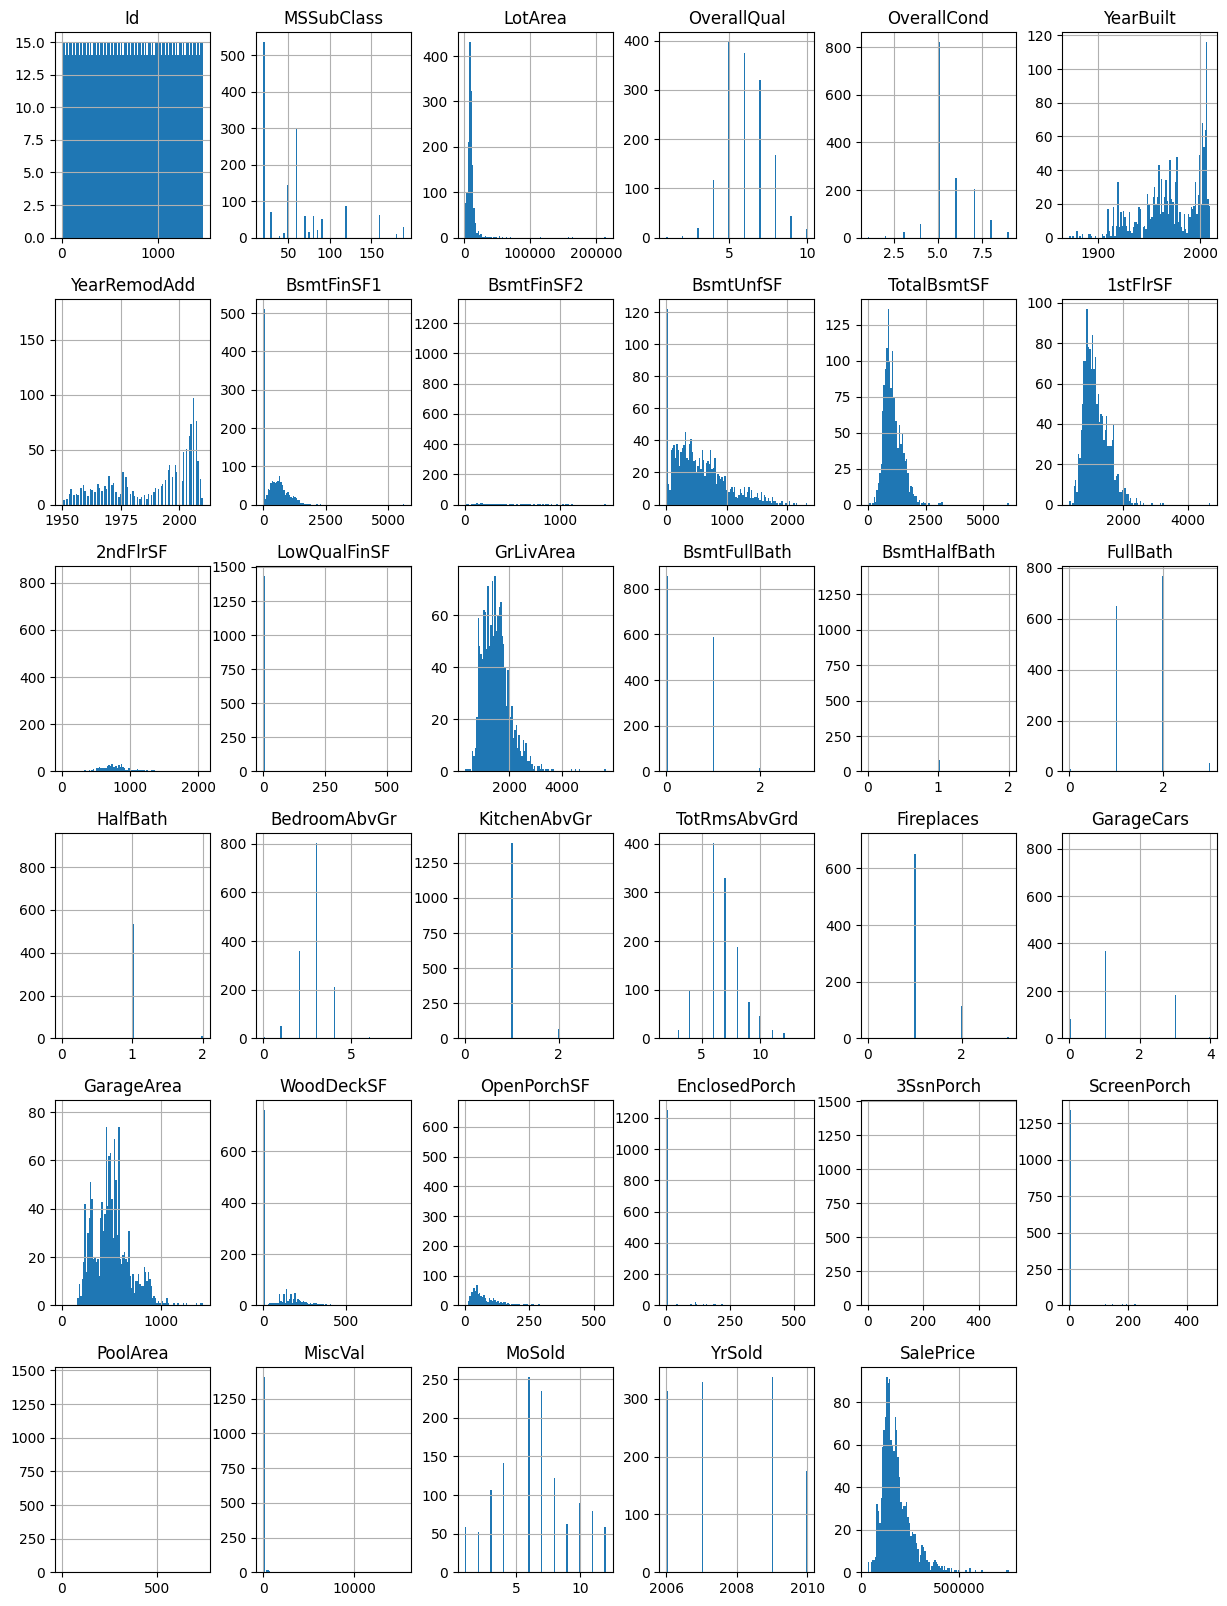

In [5]:
df.hist(bins=100,figsize=(15,20))
plt.show()

In [6]:
# Numerical features — confirmed from dataset column names
numerical_cols = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'MoSold',
    'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'OverallQual', 'OverallCond'
]

# Ordinal columns with their order preserved
ordinal_map = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}
ordinal_cols = list(ordinal_map.keys())

# Nominal (non-ordinal) categorical features — matched to real names
nominal_cols = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'Electrical', 'GarageType', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

In [7]:
y = df["SalePrice"] # Identify Target Variable
df = df.drop(columns=["SalePrice", "Id"])  # Drop ID 

missing_like = ['NA', 'N/A', 'na', 'n/a', 'NaN', 'nan', 'None', 'none', '', ' ']

In [8]:
# Clean and Impute Numerical Cols
for col in numerical_cols:
    df[col] = df[col].replace(missing_like, np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

In [9]:
# Encode ordinal columns 
ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1,
    categories=[[str(cat) for cat in ordinal_map[col]] for col in ordinal_cols]
)
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols].astype(str))

In [10]:
# Inpute Nominal columns and fill missing
for col in nominal_cols:
    if col in df.columns:
        df[col] = df[col].replace(missing_like, 'missing')
        df[col] = df[col].fillna('missing')
        df[col] = df[col].astype('category')

In [11]:
cat_cols = nominal_cols  # Nominal features only for CatBoost

Note: Any EDA steps and imputations applied to the training data must also be consistently applied to the test data; this ensures the model receives data in the same format during prediction, preventing errors or mismatches.

In [12]:
df_test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", keep_default_na=False)
final_df = df_test[["Id"]] # This Frame will be our final result after modeling

In [13]:
# Numerical columns
for col in numerical_cols:
    if col in df_test.columns:
        df_test[col] = df_test[col].replace(missing_like, np.nan)
        df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
        median_val = df[col].median()  # use median from training data
        df_test[col] = df_test[col].fillna(median_val)

df_test = df_test[df.columns]  # X is your original train set (post-processing)

In [14]:
# Ordinal columns
for col in ordinal_cols:
    if col in df_test.columns:
        df_test[col] = df_test[col].replace(missing_like, 'missing')
        df_test[col] = df_test[col].fillna('missing')

df_test[ordinal_cols] = ordinal_encoder.transform(df_test[ordinal_cols].astype(str))

In [15]:
# Nominal categorical columns
for col in nominal_cols:
    if col in df_test.columns:
        df_test[col] = df_test[col].replace(missing_like, 'missing')
        df_test[col] = df_test[col].astype('category')

In [16]:
df_test = df_test[df.columns]  # df is your original train set (post-processing)

# **Modeling**

In [17]:
model = CatBoostRegressor(silent=True, random_state=42)

In [18]:
# Hyper Parameters for our random search cross validation
param_dist = {
    'depth': [4, 10],
    'learning_rate': [0.01, 0.2],
    'iterations': [300, 1500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128]
}

cat_cols = [col for col in nominal_cols if col in df.columns] # We only use nominal cols as category due to orindal encoding

In [19]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Adjust as needed
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1 ,
    verbose=100,
    random_state=42
)

In [20]:
# Fit the model (CatBoost will internally handle categorical columns)
random_search.fit(df, y, cat_features=cat_cols)

print("Best parameters:", random_search.best_params_)
print("Best RMSE score:", -random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 3/3; 1/100] START border_count=64, depth=4, iterations=300, l2_leaf_reg=5, learning_rate=0.01
[CV 3/3; 1/100] END border_count=64, depth=4, iterations=300, l2_leaf_reg=5, learning_rate=0.01;, score=-33849.600 total time=   9.4s
[CV 3/3; 2/100] START border_count=64, depth=4, iterations=300, l2_leaf_reg=7, learning_rate=0.2
[CV 3/3; 2/100] END border_count=64, depth=4, iterations=300, l2_leaf_reg=7, learning_rate=0.2;, score=-30126.873 total time=   8.9s
[CV 2/3; 4/100] START border_count=64, depth=4, iterations=1500, l2_leaf_reg=5, learning_rate=0.2
[CV 2/3; 4/100] END border_count=64, depth=4, iterations=1500, l2_leaf_reg=5, learning_rate=0.2;, score=-31233.543 total time=  47.9s
[CV 2/3; 5/100] START border_count=32, depth=10, iterations=300, l2_leaf_reg=7, learning_rate=0.01
[CV 2/3; 5/100] END border_count=32, depth=10, iterations=300, l2_leaf_reg=7, learning_rate=0.01;, score=-38043.424 total time=  48.8s
[CV 3/3; 

In [21]:
preds = random_search.predict(df_test)

In [22]:
final_df["SalePrice"] = preds
final_df # Looking at predictions before exporting

,Id,SalePrice
0,1461,124566.878517
1,1462,165918.237631
2,1463,188435.147586
3,1464,198828.457633
4,1465,176389.067861
...,...,...
1454,2915,80978.269762
1455,2916,76665.606981
1456,2917,177241.242399
1457,2918,112417.564400


In [23]:
final_df.to_csv("predicted_sales_prices.csv", index=False)